In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# 1. Data

size information : 100 X 100, color channel: 3


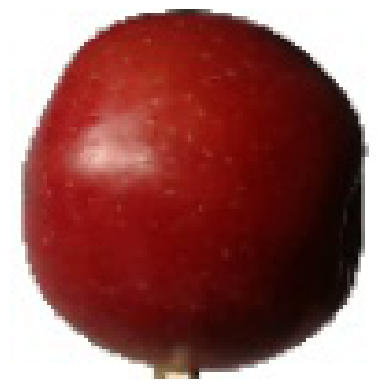

In [10]:
# 1. Data overview
import os
import matplotlib.image as mpimg

dir_path = "./datas/fruits 360{}"

ls = os.listdir(dir_path.format("/Apple"))
image = mpimg.imread(dir_path.format("/Apple/") + ls[0])

img_height, img_width, color_channel = image.shape
print("size information : {} X {}, color channel: {}".format(img_width, img_height, color_channel))

plt.imshow(image)
plt.axis("off")
plt.show()

In [11]:
# 2. Datas Import (Legacy)
import os
import matplotlib.image as mpimg

fruits = []
labels = []

class_names = ["Apple", "Banana", "Pineapple"]
for label, class_name in enumerate(class_names): 
    ls = os.listdir(dir_path.format("/" + class_name))
    
    for file_name in ls:
        image = mpimg.imread(dir_path.format("/" + class_name) + "/{}".format(file_name))
        fruits.append(image)
        labels.append(label)
        
fruits = np.array(fruits)
labels = np.array(labels)

data_count, height, width, color_channel = fruits.shape
print("data count : {}".format(data_count))
print("size information : {} X {}, color channel: {}".format(width, height, color_channel))

data count : 1470
size information : 100 X 100, color channel: 3


# 2. Feature Extraction
### i.e. Data Preprocessing
#### https://gaussian37.github.io/ml-concept-feature_extraction/

data count : 1470
size information : 100 X 100


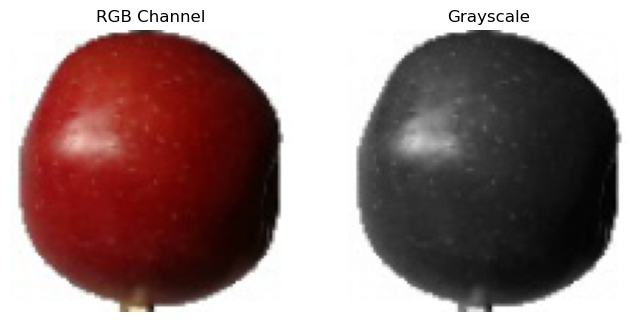

In [12]:
# 1. RGB Channel -> Grayscale Channel
R, G, B = fruits[:, :, :, 0], fruits[:, :, :, 1], fruits[:, :, :, 2]
imgGray = np.array(0.299 * R + 0.587 * G + 0.114 * B, dtype="int")

data_count, img_height, img_width = imgGray.shape

print("data count : {}".format(data_count))
print("size information : {} X {}".format(img_width, img_height))

# +. Visualization
plt.figure(figsize=(8,4))

rgb_ax = plt.subplot(1,2,1)
rgb_ax.imshow(fruits[0])
plt.title("RGB Channel")
plt.axis("off")

gray_ax = plt.subplot(1,2,2)
gray_ax.imshow(imgGray[0], cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.show()

dimension reduction data shape : (1470, 2)


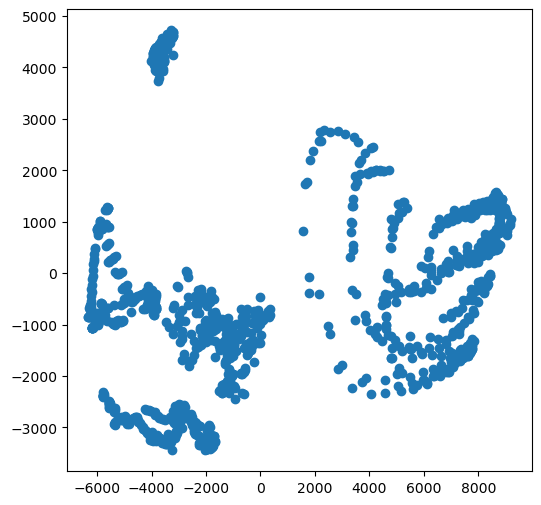

In [13]:
# 2. PCA, dimension reduction
from sklearn.decomposition import PCA 

# define
pca = PCA(n_components=2)

# sklearn.decomposition.PCA가 요구하는 fit 데이터는 2차원의 데이터를 가져야 한다.
fruits_2d = imgGray.reshape(-1, img_width * img_height)
fruits_2d = pca.fit_transform(fruits_2d)

print("dimension reduction data shape : {}".format(fruits_2d.shape))

plt.figure(figsize=(6,6))

plt.scatter(fruits_2d[:,0], fruits_2d[:, 1])

plt.show()

# 3. Model Setting

In [14]:
# 1. Ready dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fruits_2d, labels, test_size=0.2, shuffle=True, random_state=42)

print("Train Dataset Shape : {}".format(X_train.shape))
print("Test Dataset Shape : {}".format(X_test.shape))

Train Dataset Shape : (1176, 2)
Test Dataset Shape : (294, 2)


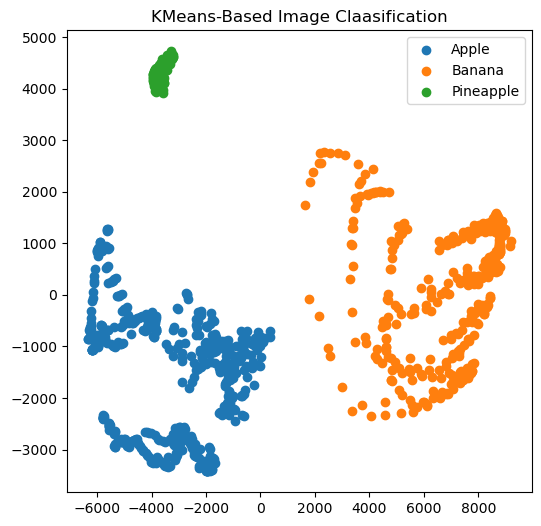

In [17]:
# 2. Model Fitting
from sklearn.cluster import KMeans

num_class = np.unique(labels).size

km = KMeans(n_clusters=num_class, random_state=42)
km.fit(X_train)
km_labels = km.labels_

plt.figure(figsize=(6,6))
for label in range(num_class):
    condition = km_labels == label
    plt.scatter(X_train[condition, 0], X_train[condition, 1], label=class_names[label])
    
plt.title("KMeans-Based Image Claasification")
plt.legend()
plt.show()

In [20]:
# 3. Evaluate
from sklearn.metrics import accuracy_score, recall_score, precision_score

predict = km.predict(X_test)

accuracy = accuracy_score(y_test, predict)
recall = recall_score(y_test, predict, average='micro')
precision = precision_score(y_test, predict, average='micro')

print("Accuracy : {}".format(accuracy.round(2)))
print("Precision : {}".format(precision))
print("Recall : {}".format(recall))

Accracy : 0.84
Precision : 0.8367346938775511
Recall : 0.8367346938775511
